<a href="https://colab.research.google.com/github/ram130849/Deep_Learning_Systems_Assignments/blob/main/TensorFlow/Tejas/Deep_Learning_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

Discussed with : Ramki Ramamurthy and Sushant Kotwal

References:</br>
1.https://www.tensorflow.org/tutorials/quickstart/beginner </br>
2.https://pyimagesearch.com/2021/05/06/implementing-feedforward-neural-networks-with-keras-and-tensorflow/</br>
3.https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/</br>
4.https://www.tensorflow.org/tensorboard/tensorboard_projector_plugin</br>
5.https://www.machinelearningplus.com/plots/subplots-python-matplotlib/#:~:text=Subplots%20mean%20a%20group%20of,canvas%20that%20holds%20multiple%20plots. </br>
6.https://numpy.org/doc/stable/reference/generated/numpy.argsort.html </br>
7.https://www.tensorflow.org/guide/keras/sequential_model </br>

In [62]:
#Path: TensorFlow/Tejas/
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline  

Found GPU at: /device:GPU:0


In [3]:

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


#Code to check connection and usage of GPU

In [4]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.8674760119999974
GPU (s):
0.04015276500000198
GPU speedup over CPU: 71x


# Build Network  
##Q1.1

In [5]:

# Plot ad hoc mnist instances
from tensorflow.keras.datasets import mnist

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [6]:
# Lets see the shapes of each Data sets
print("TRAIN SET:")
print("Training Set X_train shape is : {}".format(X_train.shape))
print("Training Set y_train shape is : {}".format(y_train.shape))
print("____"*25)
print("TEST SET:")
print("Test Set X_test shape is : {}".format(X_test.shape))
print("Test Set y_test shape is : {}".format(y_test.shape))

TRAIN SET:
Training Set X_train shape is : (60000, 28, 28)
Training Set y_train shape is : (60000,)
____________________________________________________________________________________________________
TEST SET:
Test Set X_test shape is : (10000, 28, 28)
Test Set y_test shape is : (10000,)


5


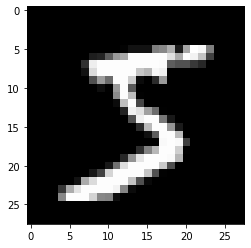

In [7]:
print(y_train[0])

# Lets its print an image
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

# So y_train has the label and X_train has its vectorial representation

##Library for Model Definition

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
# Build Sequential Model
model = keras.Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(1024, activation='relu'),
  layers.Dense(1024,activation='relu'),
  layers.Dense(1024,activation='relu'),
  layers.Dense(1024,activation='relu'),
  layers.Dense(10)
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 10)                10250     
                                                                 
Total params: 3,962,890
Trainable params: 3,962,890
Non-

Check:
param_number = output_channel_number * (input_channel_number + 1)

Dense layer 1 = 1024 * [784 + 1] = 803840 

Dense layer 2 = 1024*1025 = 1049600

Intuition is that its the connections ( Weights ) between the two layers that are to be trained.

In [30]:

model = tf.keras.Sequential([
    tf.keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28,28)),
    tf.keras.layers.Dense(units=1024,activation='relu'),
    tf.keras.layers.Dense(units=1024,activation='relu'),
    tf.keras.layers.Dense(units=1024,activation='relu'),
    tf.keras.layers.Dense(units=1024,activation='relu'),
    tf.keras.layers.Dense(units=1024,activation='relu', name="target_layer"),
    tf.keras.layers.Dense(units=10,activation='softmax')
  ])

I used Relu cause it adds sparsity and also reduces vanishing gradients. Relu will straightaway remove a few features that are not useful. This I feel helps in many ways like reducing training time, reducing features considered ( more sparse ).

In [34]:

model.compile(optimizer='adam', 
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
history = model.fit(X_train,y_train,epochs = 30, batch_size = 256 )

Epoch 1/30
235/235 [==============================] - 2s 5ms/step - loss: 0.0157 - accuracy: 0.9981
Epoch 2/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0225 - accuracy: 0.9968
Epoch 3/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0333 - accuracy: 0.9956
Epoch 4/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0108 - accuracy: 0.9983
Epoch 5/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0121 - accuracy: 0.9987
Epoch 6/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0348 - accuracy: 0.9952
Epoch 7/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0164 - accuracy: 0.9970
Epoch 8/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0129 - accuracy: 0.9977
Epoch 9/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0252 - accuracy: 0.9969
Epoch 10/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0108 - accuracy: 0.9982

In [36]:
accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3873 - accuracy: 0.9781


In [37]:
print("The Accuracy of the Model is {}".format(accuracy[-1]))

The Accuracy of the Model is 0.9781000018119812


In [38]:
y_pred = model.predict(X_test)

In [39]:
y_pred.shape


(10000, 10)

Lets take First Output of the y_pred and lets plot its image and highest prediction and check if its right

In [40]:
y_pred[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

As we can see index 3 is highest (aka label 2)
</br>
Now lets plot its image

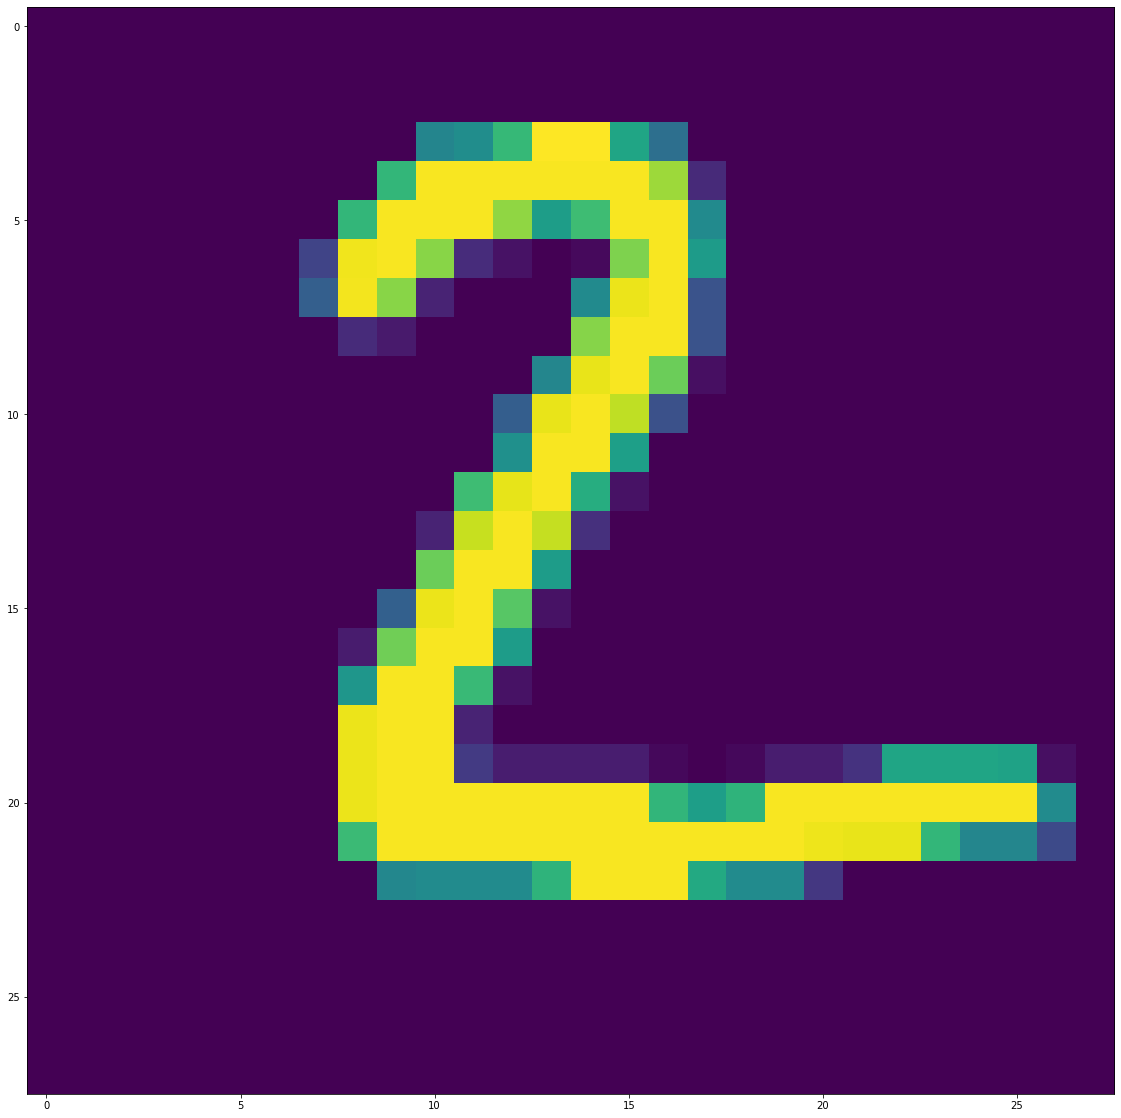

In [41]:
plt.imshow(X_test[1])


In [42]:
print(y_pred[1].argmax())


2


In [43]:
type(y_pred)

numpy.ndarray

## 1.3

Index of the chosen values ( agrsort on columns ( col is the label )
[5043 1188 3243 3242 1191 8199 8195 8194 3043 4999]
[3126 2504 3124 4450 2510 1305 1302 7708 5588 1884]
[7781 7785 1303 8950  624 7789 5053 2652  629 7412]
[2045 9227  855 9229  442 9231 4469 3150  451 5674]
[1264 8039 1274 1275 8033 1279 8011 8000 1263 3429]
[5802 2569  934 9298  935 8224 5102 6537 9289 2682]
[2428 6088  665 6094 6104 6113 6122 8944 6078 9999]
[2290 6458 6449 9294 2301 6434  415 9300 6539    0]
[4478 7109 7080 9263 7060 4496 1756 1758  401 6851]
[4679 4681 8846  593 4682 4683 8841 6451 4673 6980]
____________________________________________________________________________________________________
Plots : 




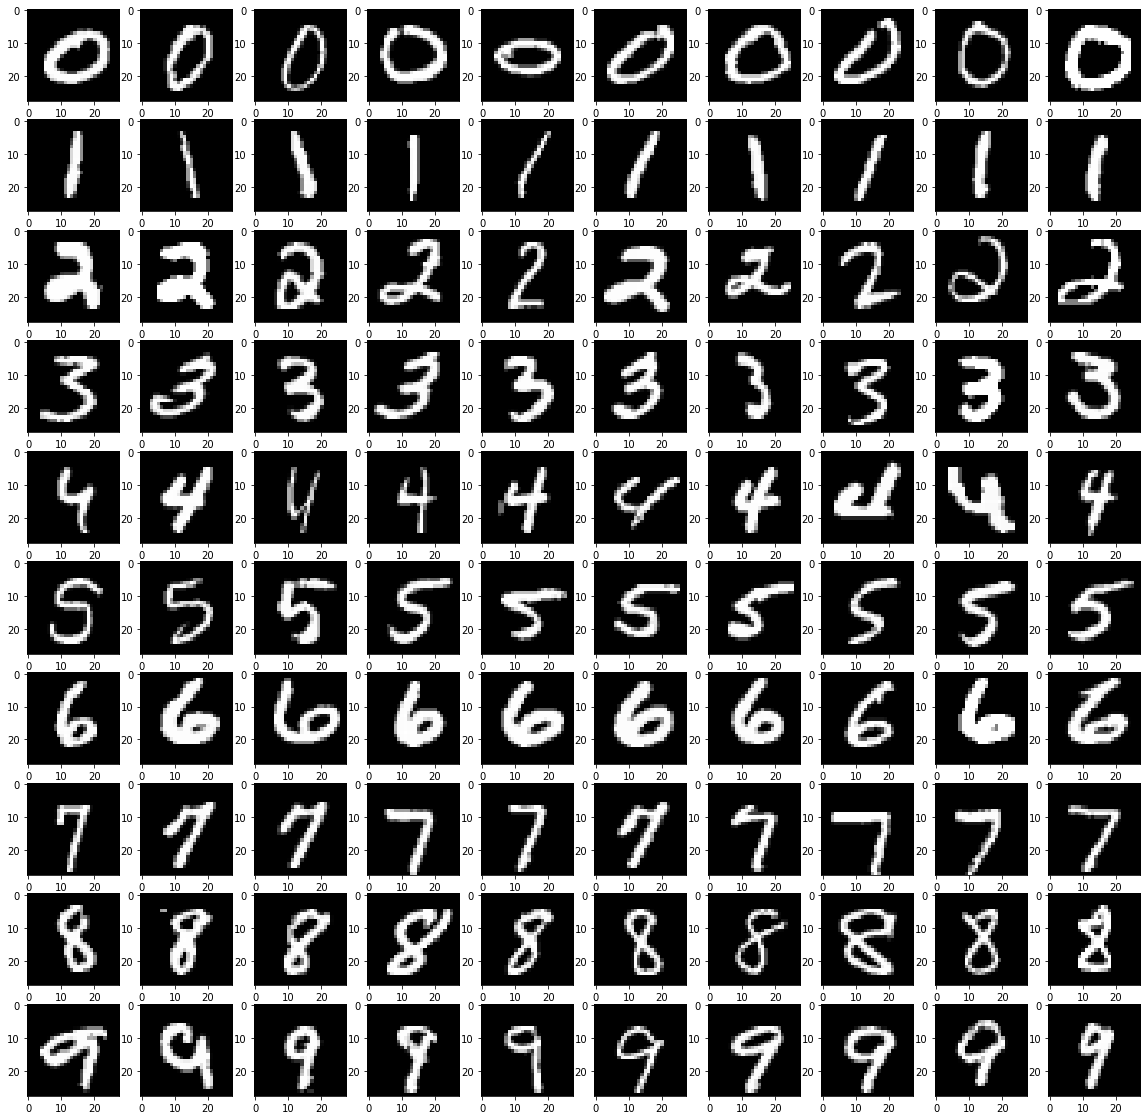

In [44]:
plt.rcParams['figure.figsize'] = (20,20) # Globally set the figure size
fig, axs = plt.subplots(10, 10)

#range fxn starts from 0 
print("Index of the chosen values ( agrsort on columns ( col is the label )")
for i in range(10):
  chosen = y_pred[:,i].argsort()[-10:][::1]
  print(chosen)
  for j in range(10):
    axs[i,j].imshow(X_test[chosen[j]], cmap=plt.get_cmap('gray'))

print("____"*25)
print("Plots : \n\n")
plt.show()

##1.4

In [45]:
y_pred_hlast = model.layers[-2].output
print(y_pred)

[[0.0000000e+00 1.0809416e-20 2.5683810e-37 ... 1.0000000e+00
  0.0000000e+00 6.7233219e-15]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 2.3044786e-37 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 2.2773693e-30]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [46]:
y_pred_hlast.shape

TensorShape([None, 1024])

In [67]:
from keras import backend

inputs = model.input                                           
outputs = model.layers[-2].output                                     
functors = [backend.function([inputs], [outputs])]    

test_outputs = [func([X_test[0:1000]]) for func in functors]

In [68]:
print(test_outputs)


[[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)]]


In [69]:
np_test_outputs = np.array(test_outputs)
type(np_test_outputs)
print(np_test_outputs.shape)

(1, 1, 1000, 1024)


In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 1024)              803840    
                                                                 
 dense_17 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_18 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_19 (Dense)            (None, 1024)              1049600   
                                                                 
 target_layer (Dense)        (None, 1024)              1049600   
                                                                 
 dense_20 (Dense)            (None, 10)               

In [76]:
feature_extractor = keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(name="target_layer").output,
)

features = feature_extractor(X_test[:1000])



In [77]:
features.shape

TensorShape([1000, 1024])

In [78]:
type(features)

tensorflow.python.framework.ops.EagerTensor

In [79]:
np_features = np.array(features)

In [80]:
np_features.shape

(1000, 1024)

The random datapoints chosen are [635, 118, 841, 253, 709, 536, 740, 751, 807, 376]
The random nodes from second last layer are [869, 768, 61, 734, 60, 896, 37, 680, 388, 716]
Index of the chosen values ( agrsort on columns ( col is the label )
0.0


AttributeError: ignored

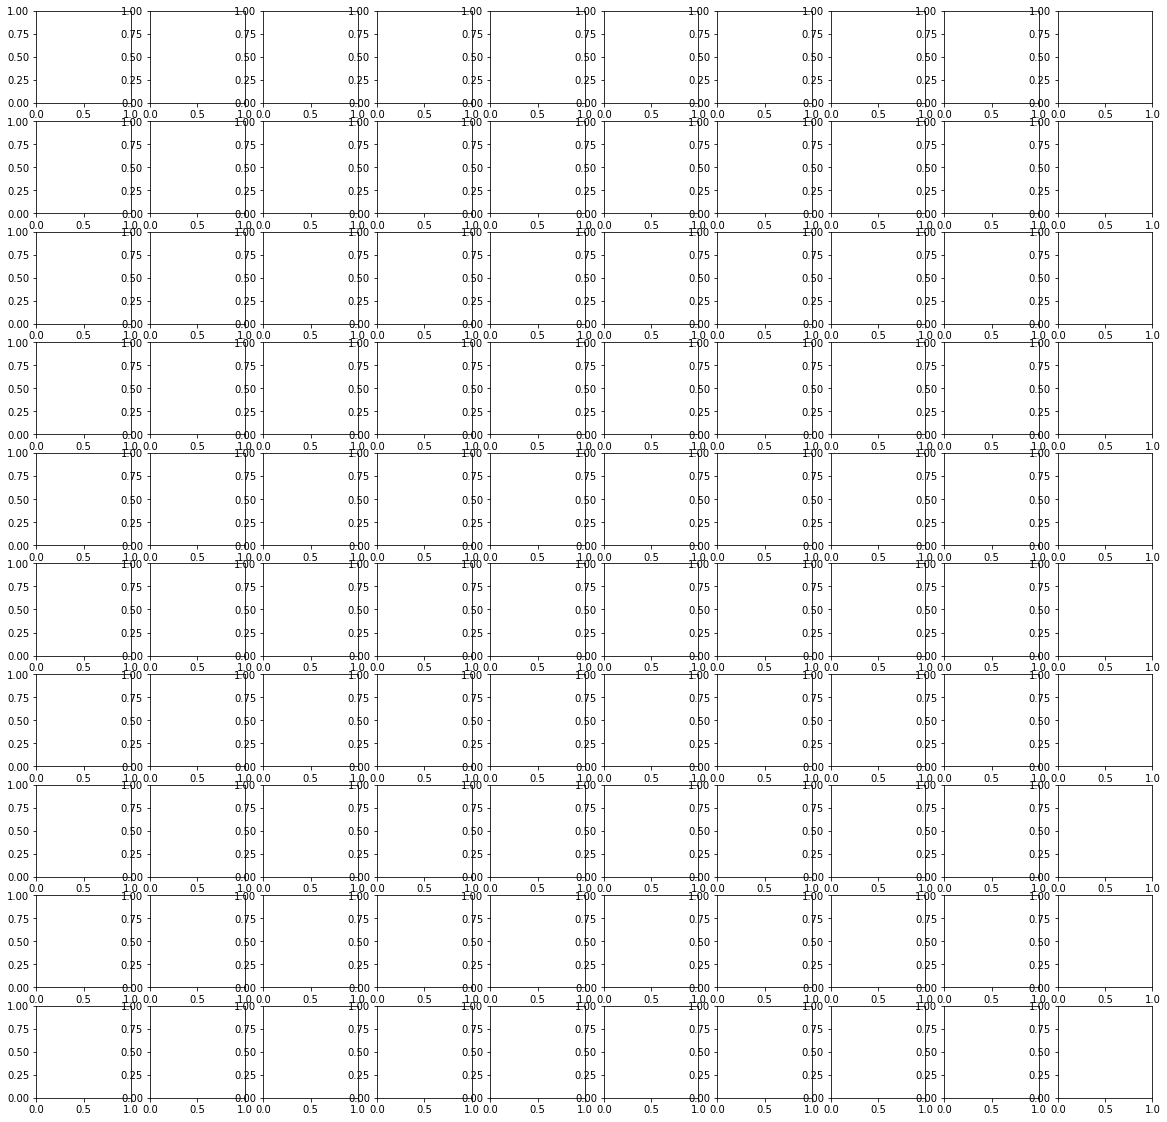

In [95]:
plt.rcParams['figure.figsize'] = (20,20) # Globally set the figure size
fig, axs = plt.subplots(10, 10)

random_row = random.sample(range(0, 1000), 10)
random_node = random.sample(range(1,1025),10)
print("The random datapoints chosen are {}".format(random_row))
print("The random nodes from second last layer are {}".format(random_node))
choice_matrix= np.zeros((10,10), dtype=int)
#range fxn starts from 0 
print("Index of the chosen values ( agrsort on columns ( col is the label )")

for i in range(10):
  for j in range(10):
    print(np_features[random_row[i],random_node[j]])
    choice_matrix[i,j].append(np_features[random_row[i],random_node[j]])

print("____"*25)
print("Plots : \n\n")
#plt.show()